<a href="https://colab.research.google.com/github/codedyasai/SoloProjects/blob/main/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8A%B9%EC%A7%84%EC%98%88%EC%B8%A1(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.기본 모듈 로딩

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

In [2]:
# 시각화용 한글 사용 가능하게하는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus']= False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 승진 대상자 분류 프로젝트
<br>

- **프로젝트의 목표:** 사원 정보를 바탕으로 **자동으로 승진 대상이 될만한 사람을 분류해내는 것**
<br>

- **프로젝트의 기대 효과: 인사팀의 업무 개선 및 사원들 / 승진 대상자들의 주요 특성 파악**
<br>

- **프로젝트의 특징:** 승진대상자가 아닌 사람을 승진대상자로 잘못 분류하는 1종오류는 크게 문제가 되지 않음<br>(승진대상 후보군을 자동으로 분류하려는 목적이기 때문) = 따라서 **정확도보다는 재현율이 중요**함.
<br>

- **사용 모델:** RandomForestClassifier, XGBClassifier, LGBMClassifier, Sequential
<br>

- **평가 지표:** 정확도(accuracy), **재현율(recall)**
<br>

- 데이터 출처: https://www.kaggle.com/datasets/muhammadimran112233/employees-evaluation-for-promotion?select=employee_promotion.csv
<br>

- **한 회사의** 사원들의 부서, 학력, 성별, 근무기간과 승진 여부 등 **사원 정보들이 기록된 데이터**

# 1.데이터 불러오기

In [3]:
df = pd.read_csv('employee_promotion.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


범주형인 컬럼(항목)들을 카테고리로 형태 변환 후 데이터 정보 확인

In [4]:
# 범주형인 컬럼(항목)들을 temp로 저장
temp = df.select_dtypes(include=['object'])

# temp를 category로 변환
df[temp.columns] = temp.astype('category')

del temp

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             52399 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  50684 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won            54808 non-null  int64   
 11  avg_training_score    52248 non-null  float64 
 12  is_promoted           54808 non-null  int64   
dtypes: category(5), float64(2), int64(6)
memory usage: 3.6 MB


**컬럼(항목) 설명**
- employee_id: 사원번호
- department: 부서
- region: 근무지
- education: 최종학력
- gender: 성별
- recruitment_channel: 고용경로
- no_ of_ trainings: 작년에 수료 완료한 기술 교육들의 수
- age: 연령
- previous_ year_ rating: 작년 사원 평가 점수
- length_ of_ service: 재직년수
- awards_ won: 작년에 상을 받았는지에 대한 여부(받았으면 1, 아니면 0)
- avg_ training_ score: 현재 수료중인 교육의 점수의 평균
<br>

- **is_promoted**: 승진 여부

# 2.결측치 파악 및 대체

In [5]:
# 컬럼(항목)별 결측값들의 수
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

education, previous_year_rating, avg_training_score 항목들에 결측치가 존재한다.

## avg_training_score 결측값 처리

In [6]:
# avg_training_score가 결측인 데이터 확인

df[df['avg_training_score'].isna()].head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
31,58536,Finance,region_31,Bachelor's,m,other,2,26,1.0,2,0,NaN,0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,NaN,1
128,42068,Operations,region_1,Master's & above,m,other,1,38,5.0,9,0,NaN,0
159,30106,Sales & Marketing,region_16,Bachelor's,f,sourcing,1,32,4.0,4,0,NaN,0
166,4134,Sales & Marketing,region_16,Bachelor's,f,other,1,39,1.0,8,0,NaN,0
170,197,Finance,region_12,Bachelor's,m,other,1,29,5.0,6,0,NaN,0
178,28314,Finance,region_26,Bachelor's,m,other,1,23,NaN,1,0,NaN,0
254,55811,Operations,region_2,Bachelor's,m,sourcing,1,28,4.0,2,0,NaN,0
264,53502,Finance,region_7,Bachelor's,m,sourcing,2,29,1.0,4,0,NaN,0
265,26409,Operations,region_2,Bachelor's,m,other,1,33,4.0,3,0,NaN,0


공통적인 특징이 나타나지 않았다.

**다변량 회귀로 결측값을 대체한다.**

In [7]:
# 범주형 변수들을 숫자형으로 변환(One-Hot Encoding) (결측치가 있는 education 제외)
df_encoded = pd.get_dummies(df, columns = df.select_dtypes(include=['category']).columns)

# 다변량 회귀로 예측한 값으로 결측치를 대체하는 모듈
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 10번 반복 학습
imputer = IterativeImputer(max_iter=10)

# 결측치 대체
df['avg_training_score'] = imputer.fit_transform(df_encoded.drop('employee_id', axis= 1)[['avg_training_score']])

del df_encoded

## previous_year_rating 결측값 처리

In [8]:
# 결측값이 있는 컬럼 중 previous_year_rating이 단순 결측인지, 아니면 올해 입사해 작년 사원평가 값이 없는 것인지 확인

temp = df['length_of_service'][df['previous_year_rating'].isna()].max()

print('작년 사원 평가가 없는 사원들의 근무기간 중 최댓값: ', temp)

del temp

작년 사원 평가가 없는 사원들의 근무기간 중 최댓값:  1


작년 사원평가가 없는 사원의 근무기간 중 최댓값이 1이므로, <br>
previous_year_rating의 결측값들은 단순히 작년에 근무를 하지 않아서 없는 것이다.

따라서 예측에 영향이 없게 결측값들을 **중위수로 대체한다.**  

In [9]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

## education 결측값 처리

In [10]:
# 원본 데이터에서 학력을 어떻게 분류했는지 확인하기
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

초등학교 미만의 교육수준을 나타내는  'Below Secondary' 가 있다.
<br>

이것으로 판단하면 **결측치들은 교육을 안 받았다는 의미가 아닌, 진짜 결측치로 판단된다.**

따라서 **'Unknown'으로 결측치를 대체한다.**

In [11]:
df['education'] = df['education'].cat.add_categories('Unknown')
df['education'].fillna('Unknown', inplace=True)

## 결측치 처리가 완료된 데이터

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won            54808 non-null  int64   
 11  avg_training_score    54808 non-null  float64 
 12  is_promoted           54808 non-null  int64   
dtypes: category(5), float64(2), int64(6)
memory usage: 3.6 MB


# 3.데이터 탐색 및 시각화


- ## **부서별 인원 수**

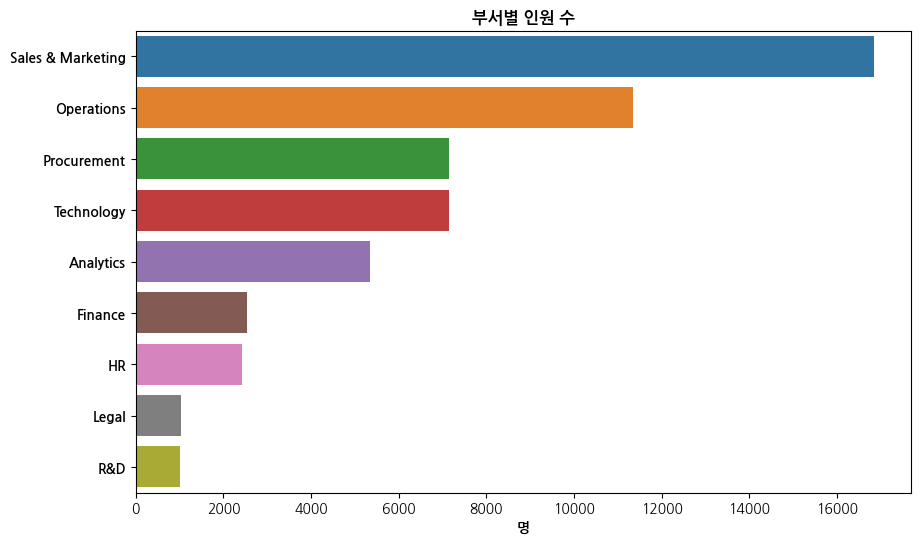

In [13]:
plt.figure(figsize=(10, 6))

sns.countplot(df, y = "department", order= df['department'].value_counts().index)

plt.title('부서별 인원 수', fontweight='bold')

plt.yticks(fontweight='bold')

plt.ylabel('')
plt.xlabel('명', fontweight='bold')



plt.show()

Sales & Marketing에 가장 많은 인원이 배치되어있다.

- ## **근무지별 인원 수**

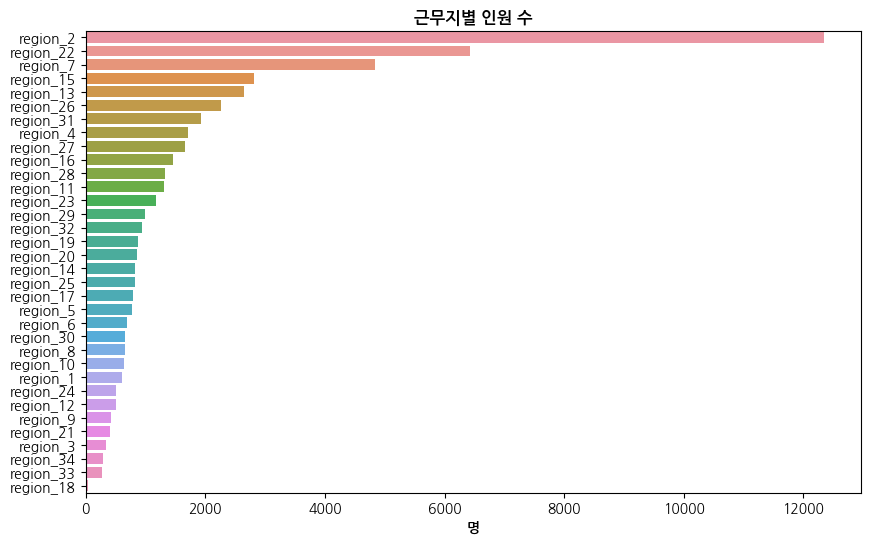

In [14]:
plt.figure(figsize=(10, 6))

sns.countplot(df, y = "region", order= df['region'].value_counts().index)

plt.title('근무지별 인원 수', fontweight='bold')

plt.ylabel('')
plt.xlabel('명', fontweight='bold')


plt.show()

region2의 근무자 비율이 매우 높다.

- ## **사원들의 최종 학력,<br>사원들의 성별,<br>고용경로 의 비율**

In [15]:
import plotly.express as px

fig1 = px.pie(df, values= df['education'].value_counts(),
             names= df['education'].value_counts().index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig1.update_traces(textposition='inside', textinfo='percent+label', textfont=dict(size=14))

fig2 = px.pie(df, values= df['gender'].value_counts(),
              names= df['gender'].value_counts().index,
              color_discrete_sequence=px.colors.sequential.Emrld)
fig2.update_traces(textposition='inside', textinfo='percent+label', textfont=dict(size=14))

fig3 = px.pie(df, values= df['recruitment_channel'].value_counts(),
              names= df['recruitment_channel'].value_counts().index,
              color_discrete_sequence=px.colors.sequential.Plasma)
fig3.update_traces(textposition='inside', textinfo='percent+label', textfont=dict(size=14))

# 각 파이 차트를 독립적으로 표시
fig1.update_layout(width=1000, height=600, title_text="사원 학력 분포 비율", font=dict(size=14))
fig2.update_layout(width=1000, height=600, title_text="사원 성별 비율", font=dict(size=14))
fig3.update_layout(width=1000, height=600, title_text="채용 경로 비율", font=dict(size=14))

# 그래프 표시
fig1.show()
fig2.show()
fig3.show()

'학력'은 학사 졸업자의 비율이 66.9%로 굉장히 높다.
<br>

'성별'은 남성의 비율이 70%로 굉장히 높다.
<br>

고용 경로는 42.4% 가량이 sourcing, 다른 방법이 55.6%이다.

- ## **작년에 수료한 기술 교육의 수 분포**

In [16]:
fig = px.histogram(df, x="no_of_trainings", nbins=10,template= 'plotly_white', text_auto=True)

# 그래프 제목 설정
fig.update_layout(
    width=1000,
    height=600,
    title="사원들의 작년에 수료한 기술 교육의 수 분포",
    font= dict(size=14, ))

fig.update_xaxes(title_text='기술 교육 수료 수')
fig.update_yaxes(title_text=None)

fig.update_xaxes(tickvals= list(df['no_of_trainings'].sort_values().unique()))

fig.show()

절대다수가 한 해에 1개의 교육만을 수료하는 것으로 보인다.

- ## **사원들의 연령대 분포**

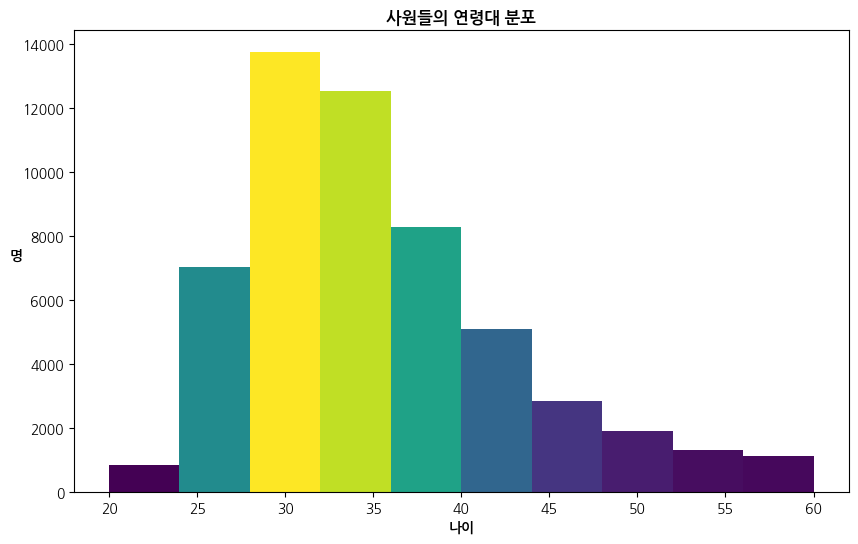

In [17]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(10, 6))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = plt.hist(df['age'])

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('사원들의 연령대 분포', fontweight='bold')

plt.ylabel('명', rotation= 0, fontweight='bold')
plt.xlabel('나이', fontweight='bold')


plt.show()

대략 28~36세 정도의 비율이 가장 많아 보인다.

- ## **승진자 비율**

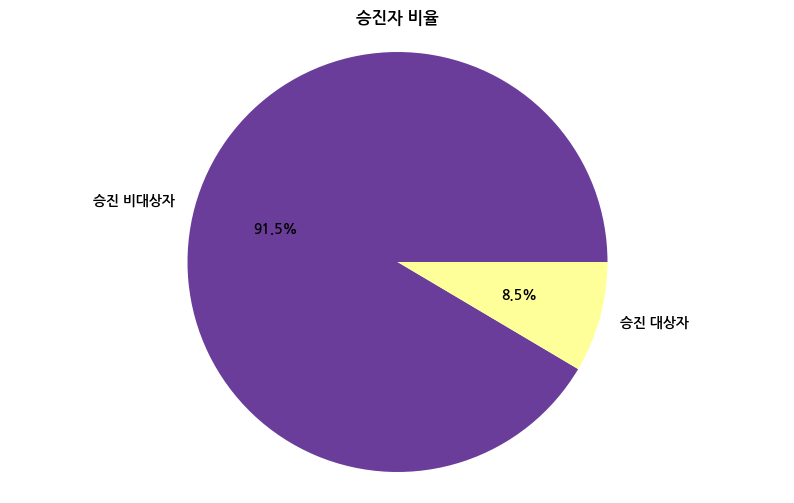

In [18]:
from matplotlib.cm import get_cmap

cmap = get_cmap('Paired')

plt.figure(figsize=(10, 6))

plt.pie(df['is_promoted'].value_counts(),
        labels= ['승진 비대상자', '승진 대상자'],
        textprops= dict(weight='bold'),
        autopct='%1.1f%%',
        colors= [cmap(0.8), cmap(0.9)]
        )

plt.axis('equal')

plt.title('승진자 비율', fontweight='bold')

plt.show()

비율의 차이가 상당히 크다. 학습시킬 때 고려해야 할 사항이다.

# 4.데이터 분석용 준비

## 범주형 변수 인코딩

In [19]:
# 범주형 컬럼들을 get_dummies를 사용하여 더미 변수로 변환

df = pd.get_dummies(df, columns= df.select_dtypes(include=['category']).columns)

## 데이터 분할

In [20]:
# 독립 변수
x = df.drop(['employee_id', 'is_promoted'], axis=1)

# 종속 변수 (타겟 컬럼)
y = df['is_promoted']

In [21]:
# 훈련 / 테스트 데이터 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify= y)

## 평가지표용 함수 생성

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve

# get(실제값, 예측값, 예측확률)
def get(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print('오차 행렬(혼돈 행렬)')
    print(confusion)

    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}')

# 5.모델 훈련 및 평가

## RandomForestClassifier 모델

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_jobs=-1)

rf_model.fit(x_train, y_train)

rf_model_pred = rf_model.predict(x_test)
rf_model_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# 모델 평가
get(y_test, rf_model_pred)

오차 행렬(혼돈 행렬)
[[12470    65]
 [  880   287]]
정확도:0.9310, 정밀도:0.8153, 재현율:0.2459, F1:0.3779


정확도는 좋으나 나머지 지표들의 값이 많이 떨어진다.

## XGBClassifier 모델

In [24]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(enable_categorical=True)

xgb_model.fit(x_train, y_train)

xgb_model_pred = xgb_model.predict(x_test)
xgb_model_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

# 모델 평가
get(y_test, xgb_model_pred)

오차 행렬(혼돈 행렬)
[[12499    36]
 [  752   415]]
정확도:0.9425, 정밀도:0.9202, 재현율:0.3556, F1:0.5130


- 정확도와 정밀도는 높지만 **재현율이 매우 떨어진다**.

목표는 승진 대상자 후보를 분류해내는 것이기 때문에 **재현율이 매우 중요하다.** 이 문제는 차후 threshold 조정으로 해결한다.

## LGBMClassifier 모델

In [25]:
from lightgbm import LGBMClassifier

lgb_model= LGBMClassifier()

lgb_model.fit(x_train, y_train)

lgb_model_pred = lgb_model.predict(x_test)
lgb_model_pred_proba = lgb_model.predict_proba(x_test)[:, 1]

# 모델 평가
get(y_test, lgb_model_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3501, number of negative: 37605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 41106, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085170 -> initscore=-2.374088
[LightGBM] [Info] Start training from score -2.374088
오차 행렬(혼돈 행렬)
[[12521    14]
 [  771   396]]
정확도:0.9427, 정밀도:0.9659, 재현율:0.3393, F1:0.5022


XGBClassfier와 큰 차이가 없었다.

## Sequential 모델

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization




# 모델 구성
seq_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification이므로 sigmoid 사용
])

# 모델 컴파일
seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
seq_model.fit(x_train, y_train, epochs=10, batch_size=32)

seq_model_pred = (seq_model.predict(x_test) > 0.5).astype("int32")

# 모델 평가
get(y_test, seq_model_pred)

Epoch 1/10
1285/1285 [==============================] - 6s 4ms/step - loss: 0.2505 - accuracy: 0.9222
Epoch 2/10
1285/1285 [==============================] - 3s 2ms/step - loss: 0.2306 - accuracy: 0.9293
Epoch 3/10
1285/1285 [==============================] - 3s 3ms/step - loss: 0.2267 - accuracy: 0.9310
Epoch 4/10
1285/1285 [==============================] - 4s 3ms/step - loss: 0.2230 - accuracy: 0.9319
Epoch 5/10
1285/1285 [==============================] - 5s 4ms/step - loss: 0.2223 - accuracy: 0.9322
Epoch 6/10
1285/1285 [==============================] - 4s 3ms/step - loss: 0.2202 - accuracy: 0.9329
Epoch 7/10
1285/1285 [==============================] - 4s 3ms/step - loss: 0.2184 - accuracy: 0.9326
Epoch 8/10
1285/1285 [==============================] - 4s 3ms/step - loss: 0.2167 - accuracy: 0.9336
Epoch 9/10
1285/1285 [==============================] - 4s 3ms/step - loss: 0.2149 - accuracy: 0.9340
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
오차 행렬(혼돈 행렬)
[[

정밀도는 더 올라갔지만 재현율은 더 감소했다.

## **최적의 모델: XGBClassifier**

# 6.선택한 모델 추가검증 및 보완

실행시간, 성능 등을 고려해
최적의 모델은 **XGBClassifier**라고 판단

## 그리드서치를 통한 최적 하이퍼파라미터 찾기

재현율이 가장 중요한만큼 평가지표는 **'recall'**로 한다.

In [27]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator= xgb_model,
                           param_grid= param_grid,
                           scoring= 'recall',
                           cv= 5,
                           n_jobs= -1)

grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 300}


In [28]:
# 재현율이 가장 높게 나온 최적의 파라미터로 다시 모델 학습

xgb_model = xgb.XGBClassifier(
    enable_categorical=True,
    **grid_search.best_params_)

xgb_model.fit(x_train, y_train)

xgb_model_pred = xgb_model.predict(x_test)
xgb_model_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

# 모델 평가
get(y_test, xgb_model_pred)

오차 행렬(혼돈 행렬)
[[12397   138]
 [  734   433]]
정확도:0.9364, 정밀도:0.7583, 재현율:0.3710, F1:0.4983


- 오히려 learning_rate와 max_depth를 올리는 것이 더 재현율이 올라갔다.
- 하지만 우리가 원하는 수준의 재현율에는 많이 모자라다.

## threshold 낮추기

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 다양한 threshold에 대한 결과 출력
for threshold in [0.5, 0.1, 0.05, 0.01]:
    y_pred = (xgb_model_pred_proba > threshold).astype(int)
    print(f"Threshold: {threshold:.1f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*40)


Threshold: 0.5
[[12397   138]
 [  734   433]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12535
           1       0.76      0.37      0.50      1167

    accuracy                           0.94     13702
   macro avg       0.85      0.68      0.73     13702
weighted avg       0.93      0.94      0.93     13702

Threshold: 0.1
[[10785  1750]
 [  508   659]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     12535
           1       0.27      0.56      0.37      1167

    accuracy                           0.84     13702
   macro avg       0.61      0.71      0.64     13702
weighted avg       0.90      0.84      0.86     13702

Threshold: 0.1
[[9330 3205]
 [ 395  772]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     12535
           1       0.19      0.66      0.30      1167

    accuracy                           0.74     

모델을 '승진 대상자 1차 자동분류'의 목적으로 사용한다면,
threshold를 0.05로 조정하는 것이 괜찮아 보인다.

## 교차검증 점수

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=10, scoring='accuracy')

# 교차 검증 점수 출력
print("평균 정확도: ", round(cv_scores.mean(), 3))

평균 정확도:  0.934


일반화 성능도 양호하다.

# 자평 / 느낀 점

- 승진은 개개인의 성과와 특성 이외에도 시계열적인 면도 고려해야 하는데, 데이터상 그러지를 못했다.<br> -> **이 모델을 실사용하는 것은 무리가 있다**

- SMOTE 등 불균형 데이터를 처리하는 방법을 몇가지 사용해보았지만 재현율의 하락을 막기는 어려웠다.

- 그리드서치에는 많은 시간이 걸리므로 빠르게 실행해야 한다면 인자를 신중하게 선택해야 한다.